In [32]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from sympy.plotting import plot3d
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data


def gra3d(mapeo,mapeo2,xmin, xmax, ymin,ymax,\
              guarda=False,malla=True,actilim=True):
    z= Symbol('z')
    x = Symbol("x", real=True)
    y = Symbol("y", real=True)
    ancho_cuadro=1.4
    marcador="o"
    tam_marcador=10
    fig=plt.figure(figsize=(20,10))

    
    
    axx1=fig.add_subplot(232,projection='3d',facecolor='w')
    axx3=fig.add_subplot(233,facecolor='w')
    axx2=fig.add_subplot(234,projection='3d',facecolor='w')
    axx4=fig.add_subplot(235,projection='3d',facecolor='w')
    axx5=fig.add_subplot(236,projection='3d',facecolor='w')
    
    at1=fig.add_subplot(231,facecolor='w')
    
    
    f1=sympify(mapeo)
    f2=sympify(mapeo2)
    f=lambdify((x,y),f1,("sympy",))
    g=lambdify((x,y),f1,("numpy",))
    F=lambdify((x,y),f2,("sympy",))
    G=lambdify((x,y),f2,("numpy",))
    
    if  actilim==False or xmin>=xmax or ymin>=ymax:
        xmin=-5
        xmax=5
        ymin=-5
        ymax=5
    
    
    X = np.arange(xmin, xmax, 0.25)
    Y = np.arange(ymin, ymax, 0.25)
    X, Y = np.meshgrid(X, Y)
    Z=g(X,Y)
    axx1.plot_surface(X, Y, Z, rstride=1, cstride=1,linewidth=0, antialiased=False,alpha=0.8)
    
    axx1.contour(X, Y, Z, zdir='z', offset=np.min(Z)-0.4*abs(np.min(Z)))
    
    axx1.contour(X, Y, Z, zdir='y', offset=ymax+0.4*abs(ymax))
    
    axx1.contour(X, Y, Z, zdir='x', offset=xmin-0.4*abs(xmin))
    
    Z=g(X,Y)
    #axx3.contourf(X, Y, Z)
    C = axx3.contour(X, Y, Z)
    axx3.clabel(C, inline=1, fontsize=12)
    
    Z=g(X,Y)
    
    axx2.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='winter',edgecolor='none')
    axx2.contour3D(X, Y, Z, 50)
    
    
    Z=g(X,Y)
    axx5.contourf(X, Y, Z, zdir='z', offset=np.min(Z)-0.4*abs(np.min(Z)), cmap='coolwarm')
    axx5.contourf(X, Y, Z, zdir='x', offset=xmin-0.4*abs(xmin), cmap='coolwarm')
    axx5.contourf(X, Y, Z, zdir='y', offset=ymax+0.1*abs(ymax), cmap='coolwarm')
    axx5.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.5)
    
    
    
    Z=g(X,Y)
    #axx4.contour3D(X, Y, Z, 50)
    axx4.plot_wireframe(X, Y, Z, color='green')
    X = np.arange(xmin/2, xmax/2, 0.25)
    Y = np.arange(ymin/2, ymax/2, 0.25)
    X, Y = np.meshgrid(X, Y)
    Z=G(X,Y)
    axx4.plot_surface(X, Y, Z, rstride=1, cstride=1,linewidth=0, antialiased=False,alpha=1)
    
    
 
    
    
      
    #at1.set_xticklabels("", visible=False)
    #at1.set_yticklabels("", visible=False)
    at1.set_axis_off()
    at1.grid(false)
    at1.set_xlim(0,1)
    at1.set_ylim(0,1)
    
    at1.text(0.2, 0.9, "La funcion", fontsize=15)
    at1.text(0.2, 0.8, "$f(x,y)=%s" % latex(f(x,y))+"$", fontsize=15)
    
    
    axx1.set_xlabel(r"$x$ ",fontsize=10,color="b")
    axx1.set_ylabel(r"$y$",fontsize=10,color="b")
    #title=axx1.set_title(r"$\mathbb{R}e(f(z))$", y=1.1,fontsize=20, color="b")
    
    axx3.set_xlabel(r"$x$ ",fontsize=10,color="b")
    axx3.set_ylabel(r"$y$",fontsize=10,color="b")
    #title=axx3.set_title(r"$\mathbb{I}m(f(z))$", y=1,fontsize=20, color="b")
    
    axx2.set_xlabel(r"$x$ ",fontsize=10,color="b")
    axx2.set_ylabel(r"$y$",fontsize=10,color="b")
    #title=axx2.set_title(r"$\|f(z)\|$", y=1,fontsize=20, color="b")


    axx4.set_xlabel(r"$x$ ",fontsize=10,color="b")
    axx4.set_ylabel(r"$y$",fontsize=10,color="b")
    #title=axx4.set_title(r"$\measuredangle f(z)$", y=1,fontsize=20, color="b")
    
    axx5.set_xlabel(r"$x$ ",fontsize=10,color="b")
    axx5.set_ylabel(r"$y$",fontsize=10,color="b")
   
    if guarda:
        plt.savefig("graficasc.png")
        plt.savefig("graficasc.svg")
        plt.savefig("graficasc.pdf")
        # No soporta en Binder
        # plt.savefig("graficasc.jpg")
        plt.close()




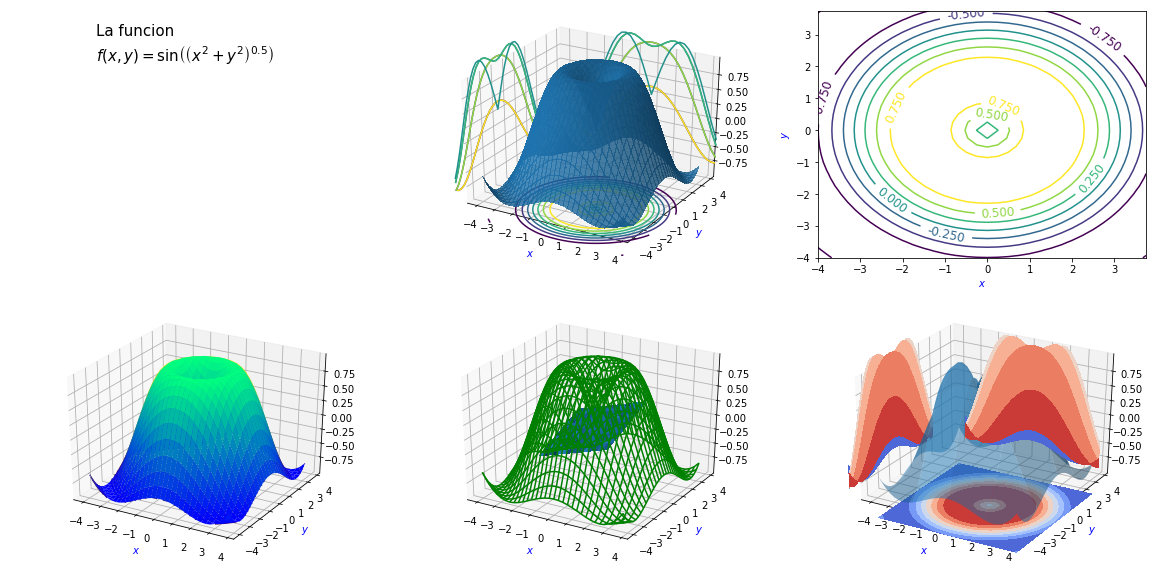

In [33]:
#Gragraficasc(mapeo,xmin,xmax,ymin,ymax,guarda=False,malla=True,actilim=True):
gra3d('sin((x**2+y**2)**0.5)','0.1*x+0.1*y',-4,4,-4,4)

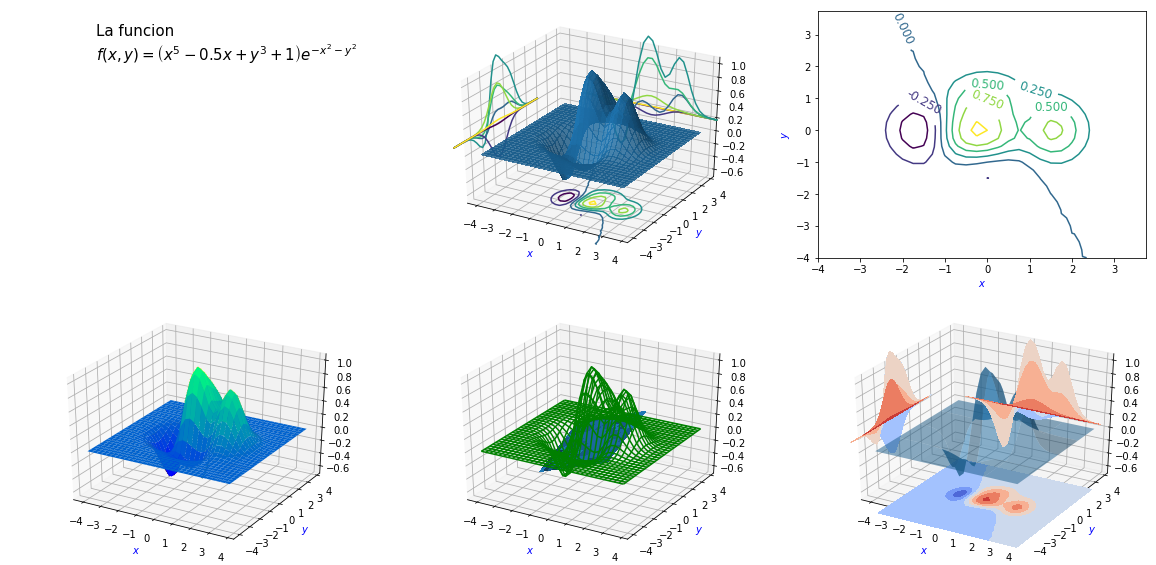

In [34]:
gra3d('(1 - x / 2 + x**5 + y**3) * exp(-x**2 -y**2)','0.1*x+0.1*y',-4,4,-4,4)